<a href="https://colab.research.google.com/github/vishalrk1/tensorflow_course/blob/main/CNN_1(Binary_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

**Importing Pizza steak data set and unziping it**

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-10-04 07:27:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 74.125.129.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   122MB/s    in 0.9s    

2021-10-04 07:27:58 (122 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



* Exploring data

In [3]:
!ls pizza_steak/

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

In [6]:
import os

for dirpath, dirnames, filename in os.walk('pizza_steak'):
  print(f"there are{len(dirnames)} directories and {len(filename)} images in '{dirpath}' ")

there are2 directories and 1 images in 'pizza_steak' 
there are2 directories and 1 images in 'pizza_steak/train' 
there are0 directories and 750 images in 'pizza_steak/train/steak' 
there are0 directories and 750 images in 'pizza_steak/train/pizza' 
there are2 directories and 1 images in 'pizza_steak/test' 
there are0 directories and 250 images in 'pizza_steak/test/steak' 
there are0 directories and 250 images in 'pizza_steak/test/pizza' 


* getting classes name programmatically

In [7]:
import pathlib

data_dir = pathlib.Path('pizza_steak/train')
classes = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = classes[1:]
print(class_names)

['pizza' 'steak']


* ploting Images

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up target folder
  target_folder = target_dir+target_class
  print(f"target_folder: {target_folder}")

  # get random image form folder
  random_image = random.sample(os.listdir(target_folder),1)
  print(f"Random Image: {random_image}")

  # Reading image and plotting image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image Shape: {img.shape}")

  return img

target_folder: pizza_steak/train/pizza
Random Image: ['853441.jpg']
Image Shape: (512, 384, 3)


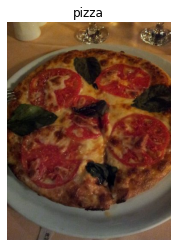

In [9]:
img = view_random_image(target_dir='pizza_steak/train/',target_class='pizza')

## Bulding an CNN model

* Load Images
* preprocessing
* build CNN
* fit CNN

In [10]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

**PreProcessing Data**

In [11]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setting up directories for data
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

#importing data from directories in batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42
                                               )

## CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compile the model
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# fit the model
history_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 45s 267ms/step - loss: 0.5376 - accuracy: 0.7193 - val_loss: 0.3985 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.4070 - accuracy: 0.8233 - val_loss: 0.3574 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3819 - accuracy: 0.8327 - val_loss: 0.4049 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3686 - accuracy: 0.8500 - val_loss: 0.3141 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 12s 255ms/step - loss: 0.3392 - accuracy: 0.8660 - val_loss: 0.3237 - val_accuracy: 0.8620


## Using normal neural network

In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/5
47/47 [==============================] - 11s 228ms/step - loss: 3.6441 - accuracy: 0.6447 - val_loss: 4.4082 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 1.2966 - accuracy: 0.6987 - val_loss: 1.4171 - val_accuracy: 0.6460
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.7513 - accuracy: 0.7360 - val_loss: 0.4711 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4427 - accuracy: 0.8073 - val_loss: 0.4348 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3864 - accuracy: 0.8327 - val_loss: 0.4157 - val_accuracy: 0.8000


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [14]:
 model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#Bulding CNN Model

* Become one with data
* Preprocess Data
* Create a CNN model

target_folder: pizza_steak/train/steak
Random Image: ['401144.jpg']
Image Shape: (512, 306, 3)
target_folder: pizza_steak/train/pizza
Random Image: ['1717790.jpg']
Image Shape: (512, 512, 3)


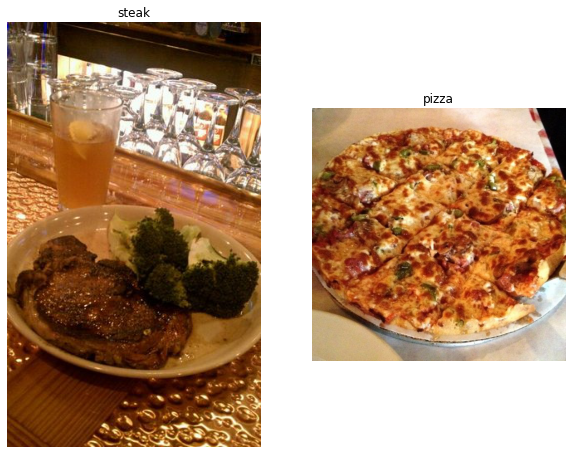

In [15]:
# ploting both classes images
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

### Preprocessing Dat

* data directory paths

In [16]:
# directories for dataet
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

* turning data in batches

In [17]:
# creating train and test data generator and rescale data
# from tensorflow.keras.preprocessing import ImageDataGenerator

# scaling data by dividing tensor value by 255
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [38]:
# Loding data from directory and turning them in batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Creating a CNN model

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D, Activation
from tensorflow.keras import Sequential

In [20]:
# creating model
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid'),
])

# compiling model
model_4.compile(
    loss='binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy'],
)

In [21]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [22]:
len(train_data), len(test_data)

(47, 16)

In [23]:
# fiting the odel
history_4 = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
)

Epoch 1/5
47/47 [==============================] - 14s 266ms/step - loss: 1.3025 - accuracy: 0.6593 - val_loss: 0.4856 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 12s 249ms/step - loss: 0.4580 - accuracy: 0.7927 - val_loss: 0.3802 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 12s 250ms/step - loss: 0.3555 - accuracy: 0.8540 - val_loss: 0.3916 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 12s 250ms/step - loss: 0.2036 - accuracy: 0.9333 - val_loss: 0.4850 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 12s 255ms/step - loss: 0.0842 - accuracy: 0.9793 - val_loss: 0.5301 - val_accuracy: 0.8100


### Evaluating Baseline model

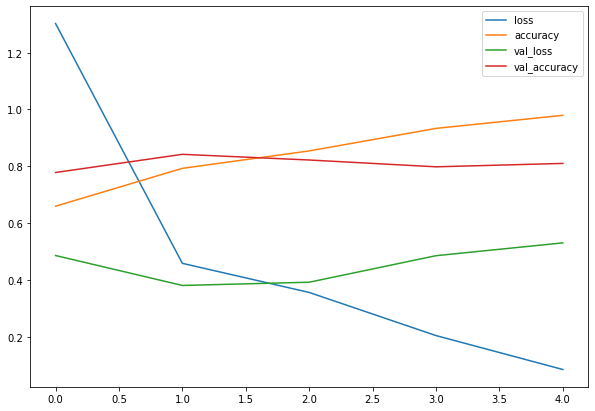

In [24]:
# plotting training curve
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [25]:
# ploting validation and trainning curve separately
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss =  history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epoch = range(len(history.history['loss']))

  # plot loss
  plt.plot(epoch, loss, label='training_loss')
  plt.plot(epoch, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epoch, accuracy, label='training_accuracy')
  plt.plot(epoch, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend() 

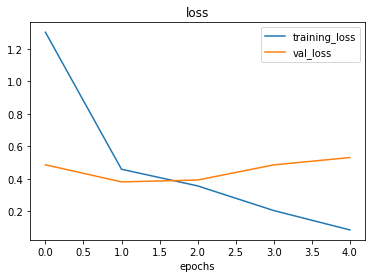

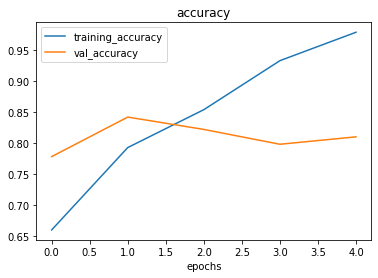

In [26]:
plot_loss_curves(history_4)

### Adjusting Model Parameters

In [27]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid'),    
])

model_5.compile(
    loss='binary_crossentropy',
    optimizer= Adam(),
    metrics = ['accuracy'],
)

In [28]:
history_5 = model_5.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data),
)

Epoch 1/5
47/47 [==============================] - 12s 236ms/step - loss: 0.6397 - accuracy: 0.6233 - val_loss: 0.4668 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4669 - accuracy: 0.7853 - val_loss: 0.3801 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4346 - accuracy: 0.8053 - val_loss: 0.3891 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4031 - accuracy: 0.8273 - val_loss: 0.4083 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4056 - accuracy: 0.8247 - val_loss: 0.3442 - val_accuracy: 0.8620


In [29]:
# summary of improvied model
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

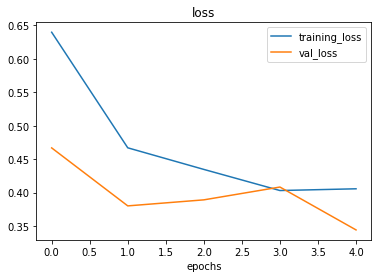

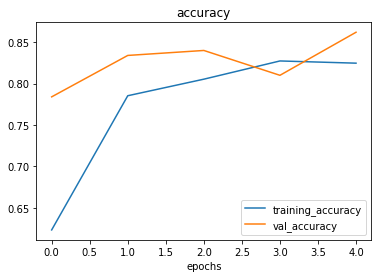

In [30]:
plot_loss_curves(history_5)

### FInding data augmentation

In [33]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [37]:
train_data_argumented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.


* **CNN Model With Argumented training data**

In [35]:
# creat model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# compiling model 
model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy'],
)

In [36]:
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [42]:
# fitting model on argumented data
history_6 = model_6.fit(
    train_data_argumented,
    epochs = 5,
    steps_per_epoch = len(train_data_argumented),
    validation_data = test_data,
    validation_steps = len(test_data),
)

Epoch 1/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6619 - accuracy: 0.5900 - val_loss: 0.6879 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5397 - accuracy: 0.7247 - val_loss: 0.4100 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4978 - accuracy: 0.7587 - val_loss: 0.4206 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.4659 - accuracy: 0.7927 - val_loss: 0.3536 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 25s 529ms/step - loss: 0.4799 - accuracy: 0.7680 - val_loss: 0.3646 - val_accuracy: 0.8580


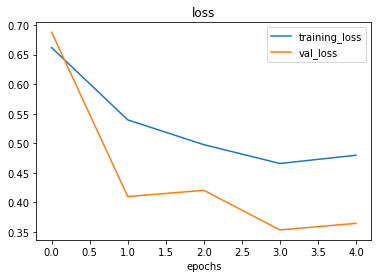

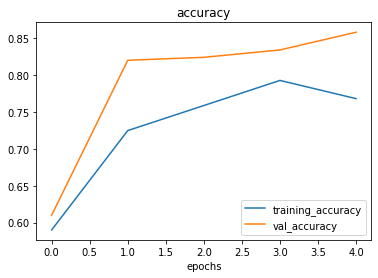

In [43]:
# loss curves
plot_loss_curves(history_6)

### Improving Model

* Adding more layers
* Increasing the number of filters
* Train for longer
* change an ideal learning rate
* get more data
* **transfer learning**

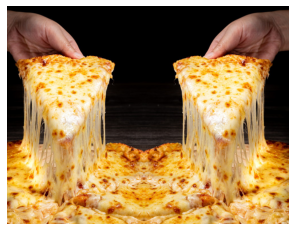

In [45]:
# testing on our own image
pizza = mpimg.imread('pizza.jpg')
plt.imshow(pizza)
plt.axis(False);

In [47]:
pizza.shape

(772, 1000, 3)

**Creating a function to import and reshape an image**

In [51]:
def load_prep_image(filename, img_shape=224):
  """
  Reades an image from filename turns it into a tensor and reshape it to (img_shape, img_shape, colour_channels)
  """

  # reading image
  img = tf.io.read_file(filename)

  # decode the read file into tensor
  img = tf.image.decode_image(img)

  # resize image 
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # rescale image
  img = img/255.

  return img

In [ ]:
# loading and preprocessing an custom image
pizza = load_prep_image('pizza.jpg')
pizza

In [58]:
pred_1 = model_6.predict(tf.expand_dims(pizza, axis=0))

In [59]:
steak = load_prep_image('steak.jpg')
pred_2 = model_6.predict(tf.expand_dims(steak, axis=0))

In [63]:
pizza2 = load_prep_image('pizza2.jpg')
pred_3 = model_6.predict(tf.expand_dims(pizza2, axis=0))

### Function to show models prediction

In [57]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [62]:
pred_class = class_names[int(tf.round(pred_1))]
pred_class

'steak'

In [64]:
pred_class = class_names[int(tf.round(pred_2))]
pred_class

'steak'

In [65]:
pred_class = class_names[int(tf.round(pred_3))]
pred_class

'pizza'

In [68]:
def pred_and_plot(model, filename, class_names= class_names):

  # loading and preparing image
  img = load_prep_image(filename)

  # predicting
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # ploting image
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False);

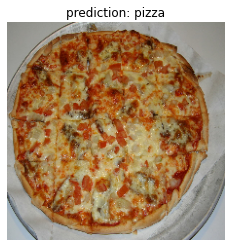

In [69]:
# testing images on model
pred_and_plot(model_6, 'pizza2.jpg')

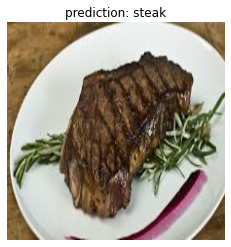

In [70]:
# testing images on model
pred_and_plot(model_6, 'steak.jpg')